In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv("NSE-TATAGLOBAL.csv")
# Sort the dataframe by date
df = df.sort_values('Date')

# Extract the closing prices
data = df.filter(['Close']).values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Define the training and testing data sizes
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size

# Split the data into training and testing sets
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

In [6]:
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [7]:
# Reshape the data for LSTM
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100
25/25 [==============================] - 10s 152ms/step - loss: 0.0085 - val_loss: 0.0220
Epoch 2/100
25/25 [==============================] - 2s 71ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 3/100
25/25 [==============================] - 2s 68ms/step - loss: 8.5790e-04 - val_loss: 0.0089
Epoch 4/100
25/25 [==============================] - 2s 65ms/step - loss: 8.0105e-04 - val_loss: 0.0073
Epoch 5/100
25/25 [==============================] - 2s 69ms/step - loss: 7.6287e-04 - val_loss: 0.0048
Epoch 6/100
25/25 [==============================] - 2s 76ms/step - loss: 7.3444e-04 - val_loss: 0.0074
Epoch 7/100
25/25 [==============================] - 2s 70ms/step - loss: 7.1689e-04 - val_loss: 0.0042
Epoch 8/100
25/25 [==============================] - 2s 74ms/step - loss: 6.7272e-04 - val_loss: 0.0049
Epoch 9/100
25/25 [==============================] - 2s 72ms/step - loss: 6.7170e-04 - val_loss: 0.0050
Epoch 10/100
25/25 [==============================] - 2s 70ms/step - l

25/25 [==============================] - 2s 75ms/step - loss: 1.4021e-04 - val_loss: 7.7482e-04
Epoch 79/100
25/25 [==============================] - 2s 72ms/step - loss: 1.3588e-04 - val_loss: 7.9166e-04
Epoch 80/100
25/25 [==============================] - 2s 75ms/step - loss: 1.4900e-04 - val_loss: 0.0012
Epoch 81/100
25/25 [==============================] - 2s 72ms/step - loss: 1.2827e-04 - val_loss: 0.0017
Epoch 82/100
25/25 [==============================] - 2s 77ms/step - loss: 1.2717e-04 - val_loss: 0.0010
Epoch 83/100
25/25 [==============================] - 2s 70ms/step - loss: 1.2405e-04 - val_loss: 9.0580e-04
Epoch 84/100
25/25 [==============================] - 2s 73ms/step - loss: 1.2678e-04 - val_loss: 9.5519e-04
Epoch 85/100
25/25 [==============================] - 2s 83ms/step - loss: 1.2457e-04 - val_loss: 9.9888e-04
Epoch 86/100
25/25 [==============================] - 2s 72ms/step - loss: 1.2060e-04 - val_loss: 9.2117e-04
Epoch 87/100
25/25 [========================

11/11 [==============================] - 2s 16ms/step


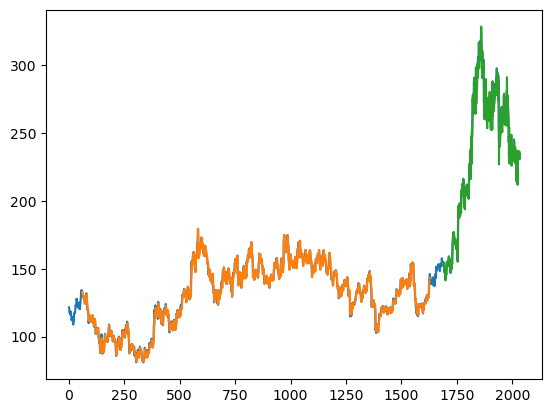

In [9]:
# Predict the closing prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the actual and predicted prices
plt.plot(data)
plt.plot(range(time_step, train_size), train_predict)
plt.plot(range(train_size + time_step, len(data)), test_predict)
plt.show()